In [57]:
# #Dataset:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

### Goal: Predicting final_price for laptops
## EDA

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [60]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [61]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [62]:
cols = ['ram','storage','screen','final_price']
df_fil = df[cols]

In [63]:
df_fil.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [64]:
df_fil.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


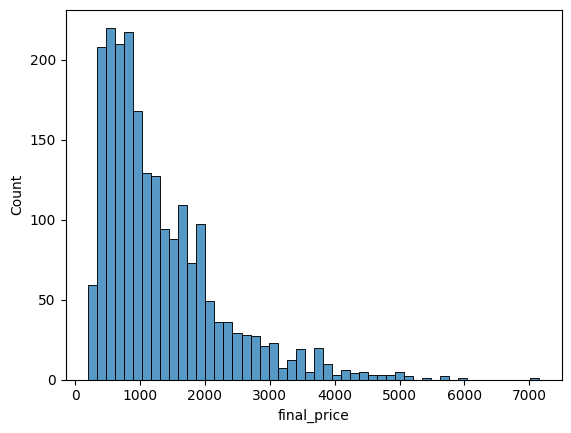

In [65]:
sns.histplot(df_fil['final_price'], bins=50);

## Q1

In [66]:
# it does have long tail
#Q1. 
df_fil.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

## Q2

In [67]:
df_fil['ram'].median()

16.0

In [68]:
#dataset preparation
len(df_fil)

2160

In [69]:
n = len(df_fil)
n_train = int(n*0.6)
n_val = int(n*0.2)
n_test = n - (n_train + n_val)

In [70]:
n, n_train, n_val, n_test

(2160, 1296, 432, 432)

In [71]:
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [72]:
np.random.seed(42)
np.random.shuffle(idx)

In [73]:
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [74]:
df_train = df_fil.iloc[idx[:n_train]]
df_val = df_fil.iloc[idx[n_train:n_train+n_val]]
df_test = df_fil.iloc[idx[n_train+n_val:]]

In [75]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


### Linear Regression Model

In [76]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) # Gram Matrix
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

### RMSE

In [77]:
def rmse(y, y_pred):
    error = y - y_pred
    sr = error ** 2 # square error
    mse = sr.mean() # mean square error
    return np.sqrt(mse) # root mean square error

In [78]:
df_train.columns

Index(['ram', 'storage', 'screen', 'final_price'], dtype='object')

In [79]:
base = ['ram', 'storage', 'screen']
y_train = np.log1p(df_train['final_price'].values)
y_val = np.log1p(df_val['final_price'].values)
y_test = np.log1p(df_test['final_price'].values)

In [80]:
# deleting the not needed columns
del df_train['final_price']
del df_test['final_price']
del df_val['final_price']

In [81]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [82]:
def prepare_X_mean(df):
    df_num = df.fillna(df_train.mean())
    X = df_num.values
    return X

In [83]:
X_train = prepare_X(df_train)
X_train[0]

array([  32. , 1000. ,   15.6])

In [84]:
df_fil.final_price.describe()

count    2160.000000
mean     1312.638509
std       911.475417
min       201.050000
25%       661.082500
50%      1031.945000
75%      1708.970000
max      7150.470000
Name: final_price, dtype: float64

In [85]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred),2)

0.43

In [86]:
X_train_mean = prepare_X_mean(df_train)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

X_val_mean = prepare_X_mean(df_val)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

round(rmse(y_val, y_pred_mean), 2)

0.43

<Axes: ylabel='Count'>

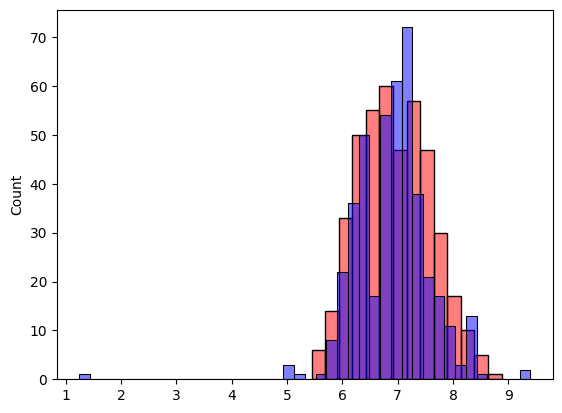

In [100]:
sns.histplot(y_val,color='red', alpha=0.5)
sns.histplot(y_pred, color='blue', alpha=0.5)

<Axes: ylabel='Count'>

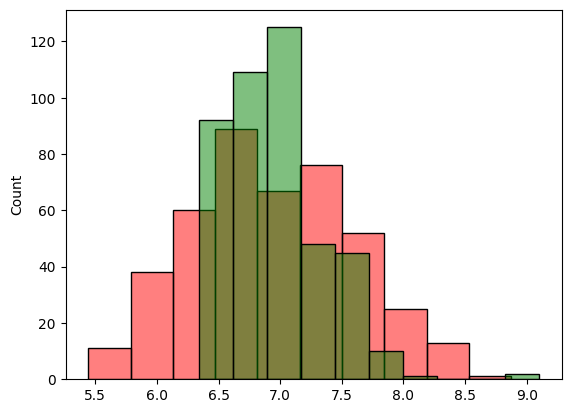

In [95]:
sns.histplot(y_val,color='red', alpha=0.5, bins=10)
sns.histplot(y_pred_mean, color='green', alpha=0.5, bins=10)

## Q4.

In [87]:
def train_linear_regression_reg(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) # Gram Matrix
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [88]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 6.727163706112961 0.4288635315474407
0.01 6.721004333260485 0.4288516360534068
0.1 6.66607550382847 0.42877560097076367
1 6.162616499461258 0.43059329897434
5 4.6160861764976975 0.46320952575805846
10 3.5167547207936636 0.5075657769236878
100 0.6849263362659601 0.6735026061725873


## Q5

In [109]:
rmse_list = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df_fil.iloc[idx[:n_train]]
    df_val = df_fil.iloc[idx[n_train:n_train+n_val]]
    df_test = df_fil.iloc[idx[n_train+n_val:]]

    base = ['ram', 'storage', 'screen']
    y_train = np.log1p(df_train['final_price'].values)
    y_val = np.log1p(df_val['final_price'].values)
    y_test = np.log1p(df_test['final_price'].values)

    del df_train['final_price']
    del df_test['final_price']
    del df_val['final_price']
    
    X_train = prepare_X(df_train)

    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    rmse_list.append(round(rmse(y_val, y_pred),3))

In [110]:
rmse_list

[0.432, 0.439, 0.443, 0.449, 0.434, 0.429, 0.444, 0.458, 0.423, 0.436]

In [111]:
round(np.std(rmse_list),3)

0.01

## Q6

In [118]:
np.random.seed(9)
np.random.shuffle(idx)

df_train = df_fil.iloc[idx[:n_train]]
df_val = df_fil.iloc[idx[n_train:n_train+n_val]]
df_test = df_fil.iloc[idx[n_train+n_val:]]

base = ['ram', 'storage', 'screen']
y_train = df_train['final_price'].values
y_val = df_val['final_price'].values
y_test = df_test['final_price'].values
    
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [119]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

608.9650127415197